# Setup

 Import standard modules

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import pandas as pd
import time
from tqdm import tqdm
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
os.chdir('/home/chris/projects/tidal_flat_0d')

In [2]:
from src import features, models
from pyprojroot import here
root = here()
sys.path.append(str(root))
wdir = root / "data" / "interim"

Import project modules from src folder

In [61]:
tides = features.load_tide(wdir, "tides.feather")
tides = tides - (np.mean(tides) + 0.6)
tides = pd.Series(tides.values)
years = 20
slr = 0.005
vals = np.empty(0)
for i in range(0, years):
    vals = np.append(vals, tides.values + slr * i)
ts = pd.Series(vals)

In [62]:
from src import models
tf = models.TidalFlat(
    tide_ts=ts,
    land_elev_init=1.15,
    conc_bound=0.9,
    grain_diam=3.5e-5,
    grain_dens=2.65e3,
    bulk_dens=900,
    org_rate_yr=2e-4,
    comp_rate_yr=4e-3,
    sub_rate_yr=3e-3,
    slr_yr=0.5,
)
tf.run()

Progress:  45%|████▍     | 3251/7300 [03:13<04:00, 16.81day/s]

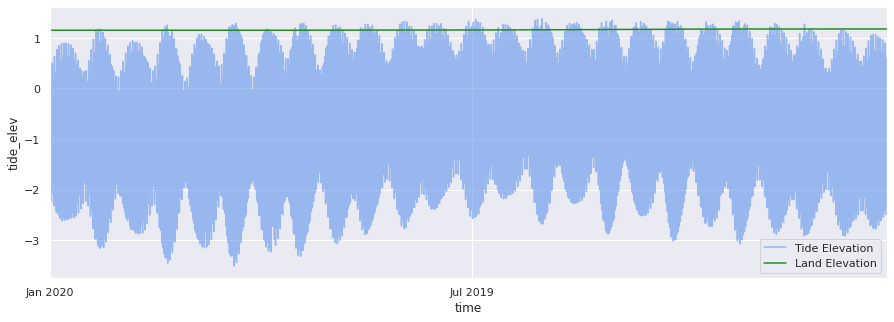

In [59]:
tf.plot(frac=0.001)